In [ ]:
pip install keras

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

In [3]:
# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [4]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
print(f'White null values: {white.isnull().sum(axis=1).sum()}')
print(f'Red null values: {red.isnull().sum(axis=1).sum()}')

White null values: 0
Red null values: 0


In [7]:
red.isna().sum(axis=1).sum()
print(f'White NaN values: {white.isna().sum(axis=1).sum()}')
print(f'Red NaN values: {red.isna().sum(axis=1).sum()}')

White NaN values: 0
Red NaN values: 0


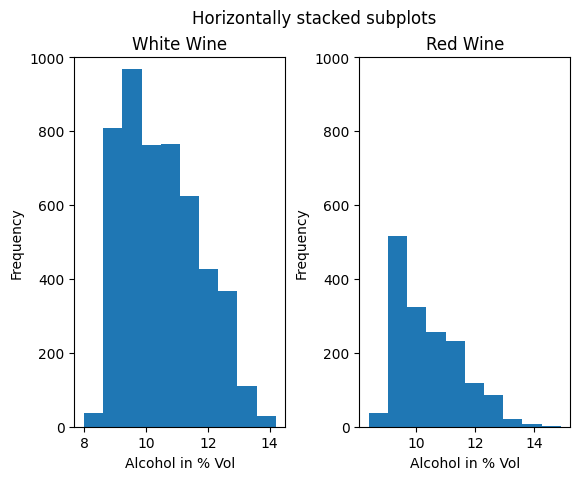

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')

ax1.title.set_text('White Wine')
ax1.set_xlabel("Alcohol in % Vol")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 1000])
ax1.hist(white['alcohol'])

ax2.title.set_text('Red Wine')
ax2.set_xlabel("Alcohol in % Vol")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1000])
ax2.hist(red['alcohol'])

fig.subplots_adjust(wspace=0.35)

In [9]:
# Add column for recognizing white/red wine (0/1)
white['type'] = 0
red['type'] = 1

In [10]:
wines = pd.concat([white, red], axis="rows")

In [11]:
wines.reset_index(drop=True, inplace=True)

In [12]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [13]:
x = wines.loc[:, wines.columns != 'type']
y = wines.loc[:,wines.columns == 'type']

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)
# create a new DataFrame with the scaled data
x_scaled = pd.DataFrame(df_scaled, columns=x.columns)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, shuffle=True)

In [16]:
model = Sequential(
    [
        Dense(12, activation="relu", name="layer1"),
        Dense(6, activation="relu", name="layer2"),
        Dense(1, activation="sigmoid", name="layer3"),
    ]
)

model.compile(loss ='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [17]:
print(X_train.shape)
print(y_train.shape)

(4352, 12)
(4352, 1)


In [18]:
# Training Model
model.fit(X_train, y_train, epochs = 3, batch_size = 1, verbose = 1)

# Predicting the Value
y_pred = model.predict(X_test)

Epoch 1/3
4352/4352 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9350 - loss: 0.2222
Epoch 2/3
4352/4352 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9926 - loss: 0.0397
Epoch 3/3
4352/4352 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9937 - loss: 0.0308
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
# continuous probabilities to discrete
y_pred_labels = (y_pred > 0.5).astype(int)

# Convert to 1D
y_test = np.ravel(y_test)
y_pred_labels = np.ravel(y_pred_labels)

In [20]:
print(y_pred_labels.shape)
print(y_test.shape)
print(y_pred.shape)

(2145,)
(2145,)
(2145, 1)


In [21]:
acc = accuracy_score(y_test, y_pred_labels)
bal_acc = balanced_accuracy_score(y_test, y_pred_labels,sample_weight=y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
cm = confusion_matrix(y_test, y_pred_labels)

print(f'Accuracy: {round(acc,2)}')
print(f'Balanced Accuracy: {round(bal_acc,2)}')
print(f'f1: {round(f1,2)}')
print(f'Precision: {round(precision,2)}')
print(f'Recall: {round(recall,2)}')
print(f'Conf matrix: ')
print(cm)

Accuracy: 0.99
Balanced Accuracy: 0.5
f1: 0.99
Precision: 1.0
Recall: 0.98
Conf matrix: 
[[1615    1]
 [  13  516]]


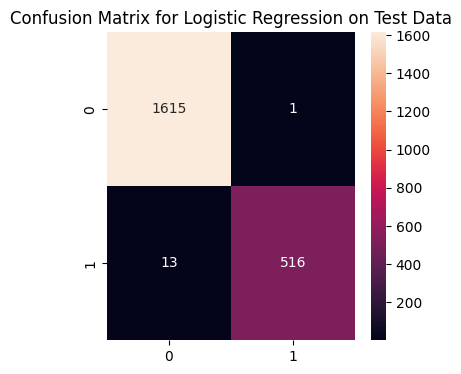

In [22]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()